In [8]:
# https://hsmmlearn.readthedocs.io/en/latest/index.html
# https://github.com/jvkersch/hsmmlearn

### Install hsmm

In [5]:
!git clone https://github.com/jvkersch/hsmmlearn.git

Cloning into 'hsmmlearn'...
remote: Enumerating objects: 519, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 519 (delta 18), reused 31 (delta 10), pack-reused 473
Receiving objects: 100% (519/519), 1.27 MiB | 9.47 MiB/s, done.
Resolving deltas: 100% (260/260), done.


In [6]:
!cd hsmmlearn

/content/hsmmlearn


In [7]:
!pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/hsmmlearn
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hsmmlearn: filename=hsmmlearn-0.1.0-cp37-cp37m-linux_x86_64.whl size=465390 sha256=e8d96047fd5d4fde2bfe254814c5a7a28bca8cc5c89cad43426f2140c53c36a9
  Stored in directory: /tmp/pip-ephem-wheel-cache-5aybk15b/wheels/13/70/75/c890a5424e6f8a19af7dc1e2a4ddcb9673fc1b21643978e6f0
Successfully built hsmmlearn


In [ ]:
#### below to fix the error "ModuleNotFoundError: No module named 'hsmmlearn.base'", here: https://github.com/jvkersch/hsmmlearn/issues/25

In [14]:
!python setup.py install

Compiling hsmmlearn/base.pyx because it changed.
[1/1] Cythonizing hsmmlearn/base.pyx
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/hsmmlearn/hsmmlearn/base.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running install
running bdist_egg
running egg_info
creating hsmmlearn.egg-info
writing hsmmlearn.egg-info/PKG-INFO
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:153: UserWarning: newlines not allowed and will break in the future
  warnings.warn("newlines not allowed and will break in the future")
writing dependency_links to hsmmlearn.egg-info/dependency_links.txt
writing requirements to hsmmlearn.egg-info/requires.txt
writing top-level names to hsmmlearn.egg-info/top_level.txt
writing manifest file 'hsmmlearn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'COPYING'
writing manif

In [16]:
!python setup.py build_ext --inplace

running build_ext
copying build/lib.linux-x86_64-3.7/hsmmlearn/base.cpython-37m-x86_64-linux-gnu.so -> hsmmlearn


### Toying with the library

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from hsmmlearn.hsmm import GaussianHSMM

durations = np.array([
    [0.1, 0.0, 0.0, 0.9],
    [0.1, 0.0, 0.9, 0.0],
    [0.1, 0.9, 0.0, 0.0]
])
tmat = np.array([
    [0.0, 0.5, 0.5],
    [0.3, 0.0, 0.7],
    [0.6, 0.4, 0.0]
])

means = np.array([0.0, 5.0, 10.0])
scales = np.ones_like(means)

hsmm = GaussianHSMM(
    means, scales, durations, tmat,
)

In [19]:
observations, states = hsmm.sample(300)

In [20]:
print(states[:20])

[2 2 1 1 1 0 0 0 0 2 2 0 0 0 0 1 1 1 2 2]


In [21]:
print(observations[:20])

[ 8.55917192  8.61943487  4.50622541  3.95042049  3.87315184 -1.8013192
  0.58958665  0.68016906  0.22714091  9.30732896  7.93245879 -1.10561102
 -0.42945294 -0.29323688 -0.40186551  4.90368887  4.91051989  4.64470966
 10.10472437  8.85210469]


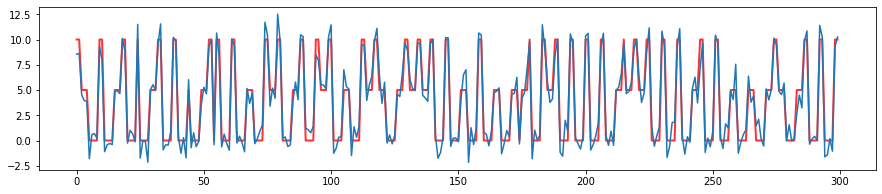

In [22]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(means[states], 'r', linewidth=2, alpha=.8)
ax.plot(observations)